# WEB PISHING DATASET

## Importação, Análise e Pré-processamento dos Dados
Feito por: Equipe Toda

### Importação

In [1]:
!pip install pandas
!pip install scipy
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

"Website Phishing" é um banco de dados que tem como objetivo detectar sites de phishing na web, problema real a respeito da segurança da informação.
WebPhishing é um site falsificado que se passa por um site legítimo, geralmente com o objetivo de roubar informações confidenciais dos usuários.

In [2]:
import pandas as pd
from scipy.io import arff

# Caminho para o arquivo ARFF
file_path = "./PhishingData.arff"

# Carregar os dados do arquivo ARFF
data, meta = arff.loadarff(file_path)

# Converter para um DataFrame do pandas
df = pd.DataFrame(data)

Ao baixar o dataset, nos foi retornado um arquivo .arff, utilizamos scipy para a leitura dele e posteriormente o transformamos em um DataFrame.

A seguir iremos entender um pouco mais sobre a sua estrutura e como os dados são apresentados.

In [3]:
#Exibir o número de linhas e colunas
print(f"WebPhishing possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

# Exibir os nomes das colunas
print("Nomes das colunas:")
print(df.columns.tolist())

WebPhishing possui 1353 linhas e 10 colunas.
Nomes das colunas:
['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor', 'web_traffic', 'URL_Length', 'age_of_domain', 'having_IP_Address', 'Result']


In [4]:
#Exibir os tipos dos dados e número de valores nulos
print(f"Tipos dos dados:\n{df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SFH                1353 non-null   object
 1   popUpWidnow        1353 non-null   object
 2   SSLfinal_State     1353 non-null   object
 3   Request_URL        1353 non-null   object
 4   URL_of_Anchor      1353 non-null   object
 5   web_traffic        1353 non-null   object
 6   URL_Length         1353 non-null   object
 7   age_of_domain      1353 non-null   object
 8   having_IP_Address  1353 non-null   object
 9   Result             1353 non-null   object
dtypes: object(10)
memory usage: 105.8+ KB
Tipos dos dados:
None


Nota-se a não presença de valores ausentes, o que nos dá um trabalho a menos.

In [5]:
#Exibir as primeiras 5 linhas do DataFrame
print(f"Primeiras 5 linhas:\n{df.head()}")

Primeiras 5 linhas:
     SFH popUpWidnow SSLfinal_State Request_URL URL_of_Anchor web_traffic  \
0   b'1'       b'-1'           b'1'       b'-1'         b'-1'        b'1'   
1  b'-1'       b'-1'          b'-1'       b'-1'         b'-1'        b'0'   
2   b'1'       b'-1'           b'0'        b'0'         b'-1'        b'0'   
3   b'1'        b'0'           b'1'       b'-1'         b'-1'        b'0'   
4  b'-1'       b'-1'           b'1'       b'-1'          b'0'        b'0'   

  URL_Length age_of_domain having_IP_Address Result  
0       b'1'          b'1'              b'0'   b'0'  
1       b'1'          b'1'              b'1'   b'1'  
2      b'-1'          b'1'              b'0'   b'1'  
3       b'1'          b'1'              b'0'   b'0'  
4      b'-1'          b'1'              b'0'   b'1'  


### Conversão de Unidades

In [6]:
# Converter as colunas de bytes para inteiros
for coluna in df.columns:
    df[coluna] = df[coluna].str.decode('utf-8').astype(int)

df.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


WebPhishing é agrupado em 9 features com seus dados representados de maneira categórica em 3 diferentes tipos: '-1' (negativo), '0'(neutro), '1'(positivo), o resultado é expresso em uma feature 'Result', tambem categórico: '-1' (Phishing), '0' (Neutro), '1' (Legítimo).

In [7]:
#Exibir as variáveis únicas
print(f"Variáveis únicas:\n{df.nunique()}")

Variáveis únicas:
SFH                  3
popUpWidnow          3
SSLfinal_State       3
Request_URL          3
URL_of_Anchor        3
web_traffic          3
URL_Length           3
age_of_domain        2
having_IP_Address    2
Result               3
dtype: int64


Aqui podemos ver a variação dos dados apresentada em cada coluna, com ressalvas para age_of_domain e having_IP_Address que apresentaram apenas dois tipos de variação.

In [8]:
data = pd.read_json("metadata/features_description.json")
df_features = pd.DataFrame(data)
df_features

,Feature,Description,-1,0,1
0,SFH,Server Form Handler (envio de informações pro ...,SFH Vazio,SHF Com outro Domínio,Qualquer outra coisa
1,SSLfinal_State,Validação do SSL (https e emissor confiável),Sem HTTPS,HTTPS Não Confiável,HTTPS Confiável
2,popUpWidnow,Uso de pop-up window para submeter credenciais,Clique Direito desabilitado,Clique Direito mostra um alerta,Qualquer outra coisa
3,Request_URL,Proporção de recursos externos carregados,Maior que 61%,Entre 22%-61%,Menor que 22%
4,URL_of_Anchor,Proporção de links âncora externos,Maior que 67%,Entre 31%-67%,Menor que 31%
5,web_traffic,Tráfego do site (AlexaDataBase Rank),Sem tráfego,Rank <= 150k,Rank > 150k
6,URL_Length,Comprimento da URL,Maior que 75 caracteres,Entre 54-75 caracteres,Menor que 54 caracteres
7,age_of_domain,Idade do domínio,Menor que 6 meses,- - - - - - -,Maior que 6 meses
8,having_IP_Address,Presença de endereço IP na URL,Com IP,- - - - - - -,Sem IP


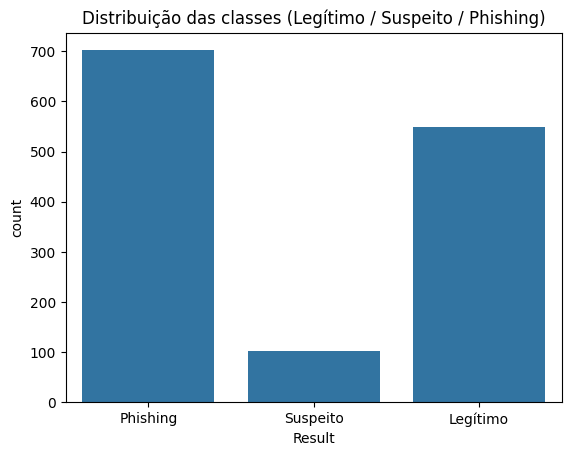

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Result', data=df)
plt.title('Distribuição das classes (Legítimo / Suspeito / Phishing)')
plt.xticks(ticks=[0, 1, 2], labels=['Phishing', 'Suspeito', 'Legítimo'])
plt.show()


Podemos ver que a maioria dos sites são phishing, seguidos por sites legítimos e, por último, os sites suspeitos. Isso pode indicar que o conjunto de dados é desbalanceado, o que pode afetar o desempenho dos modelos de aprendizado de máquina. Portanto, será importante considerar técnicas de balanceamento de classes ao treinar modelos com esses dados.

### Análise de Correlação

Como queremos prever se um site é phishing ou não, podemos estabelecer que nosso atributo alvo é 'Result'.

Vamos ver portanto, atributos que estão mais correlacionados com nosso atributo alvo.

In [10]:
correlation = df.corr(numeric_only=True)['Result'].sort_values(key=abs, ascending=False)
print(correlation)

Result               1.000000
SFH                 -0.678277
SSLfinal_State      -0.518762
popUpWidnow         -0.509749
URL_of_Anchor       -0.287007
Request_URL         -0.271609
web_traffic          0.243896
age_of_domain       -0.231931
URL_Length          -0.183061
having_IP_Address   -0.059225
Name: Result, dtype: float64


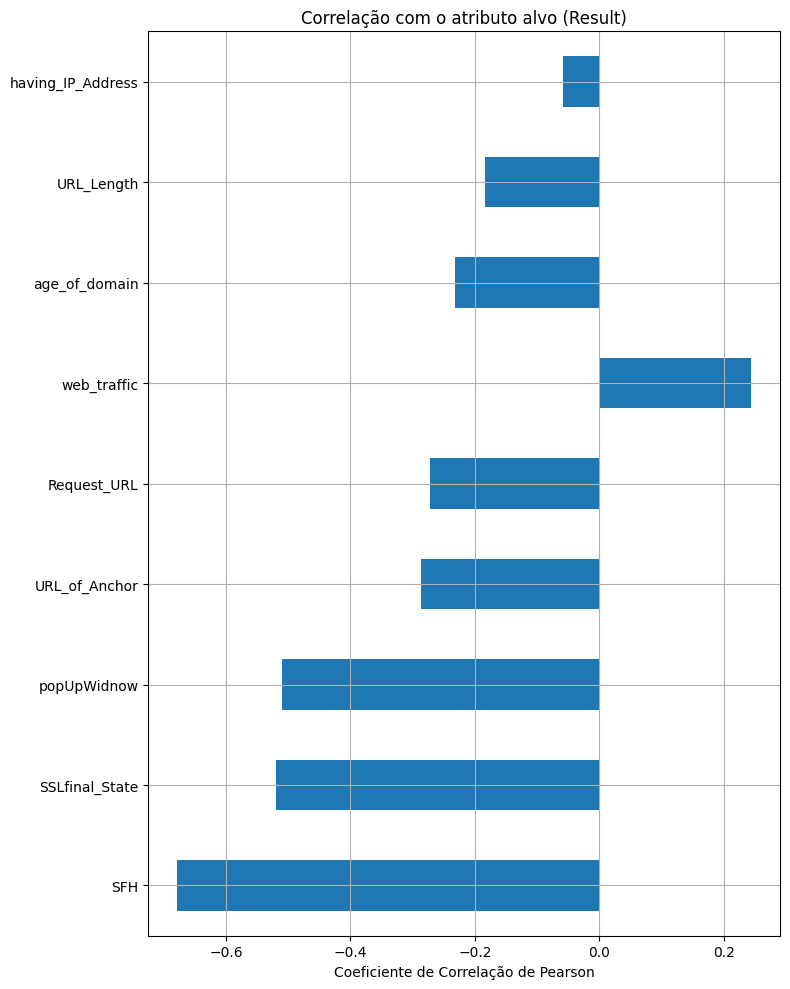

In [11]:
correlation.drop('Result').plot(kind='barh', figsize=(8, 10))
plt.title('Correlação com o atributo alvo (Result)')
plt.xlabel('Coeficiente de Correlação de Pearson')
plt.grid(True)
plt.tight_layout()
plt.show()

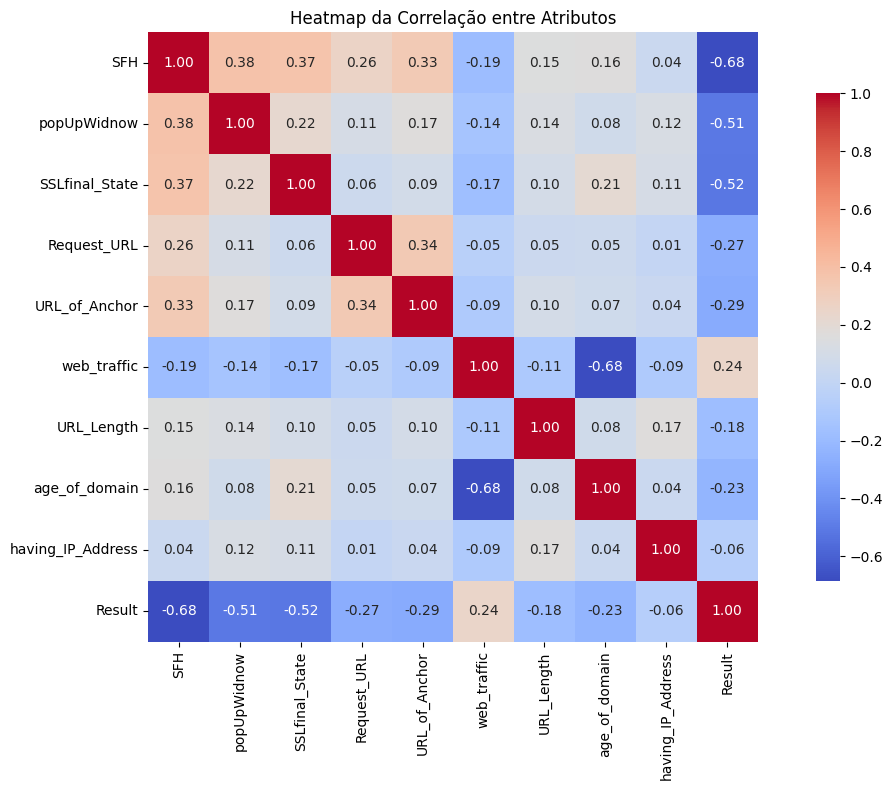

In [12]:
# Heatmap da correlação

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap da Correlação entre Atributos')

plt.tight_layout()  
plt.show()

### Análise de Correlação

Com base nas visualizações de correlação:

1. O **gráfico de barras** mostra o coeficiente de correlação de Pearson entre cada feature e o target. Valores próximos de 1 ou -1 indicam uma forte correlação, enquanto valores próximos de 0 indicam uma correlação fraca (força absoluta).

- `SFH`: Apresenta a correlação mais forte com 'Result' (aprox. -0.68). Forte correlação negativa. À medida que o valor de SFH muda, a probabilidade de phishing muda significativamente na direção oposta.
- `SSLfinal_state`: Segunda correlação mais forte (aprox. -0.52).
- `popUpWindow`: Correlação negativa significativa (aprox. -0.51).
- `URL_of_Anchor`: Correlação negativa moderada (aprox. -0.47).
- `Request_URL`: Correlação negativa moderada (aprox. -0.29).
- `web_traffic`: Correlação positiva moderada (aprox. 0.24). A correlação positiva mais proeminente. À medida que o tráfego da web aumenta, a probabilidade de phishing também aumenta.
- `age_of_domain`: Correlação negativa moderada (aprox. -0.23).
- `URL_Length`: Correlação negativa mais fraca (aprox. -0.18).
- `having_IP_Address`: Correlação negativa muito fraca (aprox. -0.06). Pouca influência na previsão de phishing.

2. O **heatmap** mostra a mesma informação, mas de uma maneira diferente. As cores mais escuras indicam uma correlação mais forte, enquanto as cores mais claras indicam uma correlação mais fraca. A correlação entre 'Result' e 'SFH' é a mais forte, seguida por 'SSLfinal_state' e 'popUpWindow'.
- As correlações entre as principais características (ex: SFH, SSLfinal_State, popUpWidnow) e outras características são geralmente baixas a moderadas (principalmente abaixo de |0,4|). Por exemplo, SFH e popUpWidnow é 0,38; SFH e SSLfinal_State é 0,37. Esses valores não são altos o suficiente para sugerir redundância extrema entre os principais preditores de 'Result'.
- URL_of_Anchor e Request_URL têm uma correlação de 0,34, que é moderada, mas aceitável.

### Conclusão da Análise

As melhores features são aquelas que possuem uma correlação mais forte com o target e não são excessivamente redundantes entre si. Portanto, as features mais relevantes para prever phishing são:

1. `SFH`
2. `SSLfinal_state`
3. `popUpWindow`
4. `URL_of_Anchor`
5. `Request_URL`
6. `web_traffic`
7. `age_of_domain`

### Justificativa

- Exibem os maiores coeficientes de correlação com o target, indicando uma relação linear mais forte com a probabilidade de phishing.
- O mapa de calor mostra que, embora algumas dessas fetures têm correlações entre si, elas não são tão altas a ponto de sugerir redundância extrema. Isso significa que cada uma delas traz informações únicas para o modelo.
- Features como `having_IP_Address` e `URL_Length` têm correlações mais fracas com o target e também são mais redundantes entre si, tornando-as menos úteis para a previsão de phishing.

## USO DE MODELOS PREDITIVOS PARA OBTER AS PREDIÇÕES

## RandomForestClassifier 
Feito por: João Pedro

In [13]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report

# Separar os dados que queremos usar para treinar o modelo
X = df.drop('Result', axis=1)
y = df['Result']

# Dividir os dados em conjuntos de treino e teste usando stratify para manter a proporção das classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

categorical_features = X.columns.tolist()

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
)

rf_with_scaler = Pipeline([
    ('scaler', preprocessor),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

rf_no_scaler = RandomForestClassifier(class_weight='balanced', random_state=42)

scoring = (
    'accuracy', 'f1_macro', 'precision_macro', 'recall_macro'
)

score_no_scaler = cross_validate(
    rf_no_scaler, X_train, y_train, cv=kf, scoring=scoring
)

score_with_scaler = cross_validate(
    rf_with_scaler, X_train, y_train, cv=kf, scoring=scoring
)

rf_df_results = pd.DataFrame({
    'Sem OneHot': [score_no_scaler[f'test_{m}'].mean() for m in scoring],
    'Com OneHot': [score_with_scaler[f'test_{m}'].mean() for m in scoring]
}, index=['Accuracy', 'F1_Macro', 'Precision_Macro', 'Recall_Macro'])

rf_df_results


,Sem OneHot,Com OneHot
Accuracy,0.899270,0.901126
F1_Macro,0.870819,0.877714
Precision_Macro,0.873723,0.881725
Recall_Macro,0.876342,0.877672


Neste código dividimos o dataset em treino e teste, e aplicamos a validação cruzada com StratifiedKFold, devido aos dados desbalanceados, após isso instanciamos o RandomForestClassifier em um conjunto de dados não processado com OneHotEncoder, e um conjunto de dados "escalados" ou préprocessados com OneHotEncoder. Vamos testar com diferentes Hiperparâmetros utilizando o GridSearchCV.

In [14]:
from sklearn.model_selection import GridSearchCV

# Grade de hiperparâmetros para o GridSearch
param_grid_with_scaler = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2],
}

param_grid_no_scaler = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_search_with_scaler = GridSearchCV(
    estimator=rf_with_scaler,
    param_grid=param_grid_with_scaler,
    scoring=scoring,
    refit='f1_macro',
    cv=kf,
    n_jobs=-1,
)

grid_search_no_scaler = GridSearchCV(
    estimator=rf_no_scaler,
    param_grid=param_grid_no_scaler,
    scoring=scoring,
    refit='f1_macro',
    cv=kf,
    n_jobs=-1,
)

grid_search_no_scaler.fit(X_train, y_train)
grid_search_with_scaler.fit(X_train, y_train)

print("Melhores parâmetros com OneHot:")
print(grid_search_with_scaler.best_params_)
print(f"Melhor F1 macro com OneHot: {grid_search_with_scaler.best_score_:.4f}")

print("\nMelhores parâmetros sem OneHot:")
print(grid_search_no_scaler.best_params_)
print(f"Melhor F1 macro sem OneHot: {grid_search_no_scaler.best_score_:.4f}")

# Avaliar o melhor modelo com OneHot no conjunto de teste
best_model_with_scaler = grid_search_with_scaler.best_estimator_
y_pred_with_scaler = best_model_with_scaler.predict(X_test)
print("Relatório de classificação do modelo com OneHot (teste):")
print(classification_report(y_test, y_pred_with_scaler))

# Avaliar o melhor modelo sem OneHot no conjunto de teste
best_model_no_scaler = grid_search_no_scaler.best_estimator_
y_pred_no_scaler = best_model_no_scaler.predict(X_test)
print("Relatório de classificação do modelo sem OneHot (teste):")
print(classification_report(y_test, y_pred_no_scaler))


Melhores parâmetros com OneHot:
{'rf__max_depth': 10, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Melhor F1 macro com OneHot: 0.8841

Melhores parâmetros sem OneHot:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Melhor F1 macro sem OneHot: 0.8839
Relatório de classificação do modelo com OneHot (teste):
              precision    recall  f1-score   support

          -1       0.95      0.89      0.92       140
           0       0.75      0.86      0.80        21
           1       0.89      0.94      0.91       110

    accuracy                           0.91       271
   macro avg       0.86      0.90      0.88       271
weighted avg       0.91      0.91      0.91       271

Relatório de classificação do modelo sem OneHot (teste):
              precision    recall  f1-score   support

          -1       0.95      0.90      0.92       140
           0       0.78      0.86      0.82        21
           1     

In [15]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

# Dicionário com as métricas a serem usadas
metrics = {
    'Acurácia': accuracy_score,
    'F1 Macro': lambda y_true, y_pred: f1_score(y_true, y_pred, average='macro'),
    'Precisão Macro': lambda y_true, y_pred: precision_score(y_true, y_pred, average='macro'),
    'Recall Macro': lambda y_true, y_pred: recall_score(y_true, y_pred, average='macro'),
}

# Calcula as métricas para os dois modelos no conjunto de teste
resultados = []
for nome, func in metrics.items():
    resultados.append([
        nome,
        func(y_test, y_pred_with_scaler),
        func(y_test, y_pred_no_scaler)      
    ])

# Cria DataFrame de resultados
df_resultados = pd.DataFrame(resultados, columns=[
    'Métrica', 'Com OneHot', 'Sem OneHot'
])

Aqui criamos um df_resultados que ajudará a visualizar melhor os dados posteriormente.

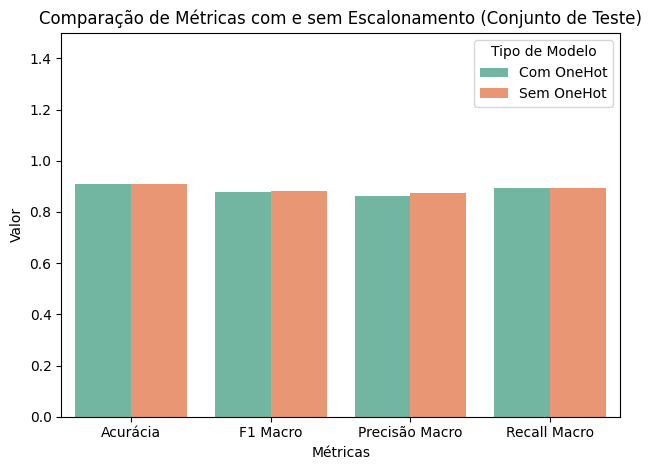

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


# Transforma o DataFrame para formato "long" (melt) para usar no seaborn
df_melted = df_resultados.melt(id_vars="Métrica", var_name="Tipo", value_name="Valor")

# Plotar gráfico de barras agrupadas
sns.barplot(data=df_melted, x="Métrica", y="Valor", hue="Tipo", palette="Set2")

plt.title("Comparação de Métricas com e sem Escalonamento (Conjunto de Teste)")
plt.ylim(0, 1.50)
plt.ylabel("Valor")
plt.xlabel("Métricas")
plt.legend(title="Tipo de Modelo")
plt.tight_layout()
plt.show()


Como o Random Forest não depende da escala dos dados, o impacto do pré-OneHot via OneHotEncoder foi mínimo. Apesar disso, mantivemos a padronização no fluxo para garantir compatibilidade com outros algoritmos sensíveis à escala. O desempenho geral foi consistente entre as versões com e sem escalonamento, com o modelo atingindo uma média de F1 Macro acima de 0.88 e accuracy de 91% no conjunto de teste.
Agora vamos medir os resultados no conjunto de treino. 

In [17]:
final_model_with_scaler = grid_search_with_scaler.best_estimator_
final_model_with_scaler.fit(X_train, y_train)

final_model_no_scaler = grid_search_no_scaler.best_estimator_
final_model_no_scaler.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=300, random_state=42)

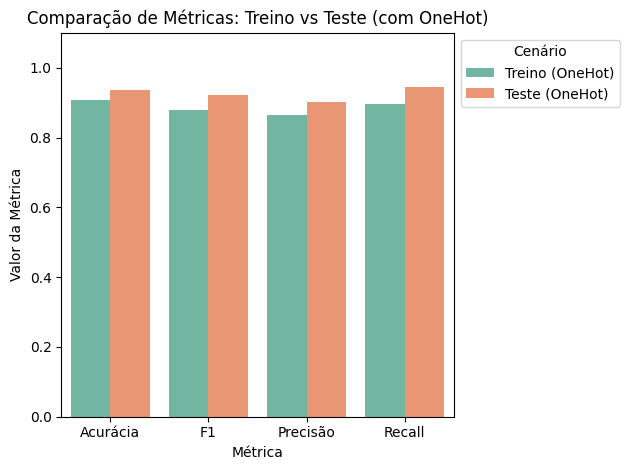

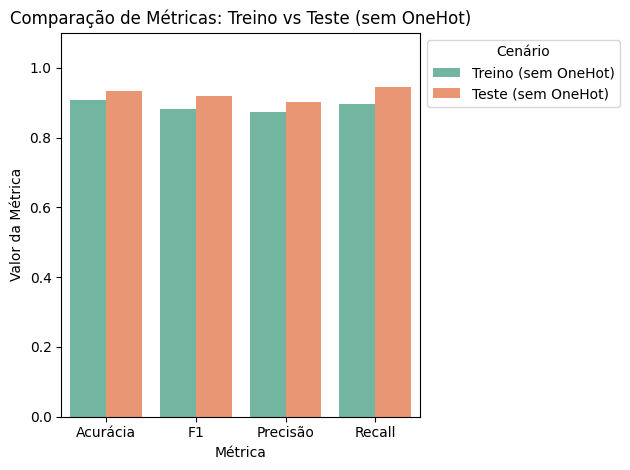

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Função para calcular métricas
metrics_dict = {
    'Acurácia': accuracy_score,
    'F1': lambda y_true, y_pred: f1_score(y_true, y_pred, average='macro'),
    'Precisão': lambda y_true, y_pred: precision_score(y_true, y_pred, average='macro'),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred, average='macro'),
}

# Previsões no conjunto completo
y_pred_full_with_scaler = final_model_with_scaler.predict(X)
y_pred_full_no_scaler = final_model_no_scaler.predict(X)

# Montar DataFrame de resultados
resultados = []
for nome, func in metrics_dict.items():
    resultados.append([
        nome,
        func(y_test, y_pred_with_scaler),
        func(y, y_pred_full_with_scaler),
        func(y_test, y_pred_no_scaler),
        func(y, y_pred_full_no_scaler)
    ])

df_resultados = pd.DataFrame(resultados, columns=[
    'Métrica',
    'Treino (OneHot)',
    'Teste (OneHot)',
    'Treino (sem OneHot)',
    'Teste (sem OneHot)'
])

# Dados com escalonamento
melted_with_scaler = df_resultados.melt(
    id_vars='Métrica',
    value_vars=['Treino (OneHot)', 'Teste (OneHot)'],
    var_name='Com OneHot',
    value_name='Valor'
)

# Dados sem escalonamento
melted_no_scaler = df_resultados.melt(
    id_vars='Métrica',
    value_vars=['Treino (sem OneHot)', 'Teste (sem OneHot)'],
    var_name='Sem OneHot',
    value_name='Valor'
)

# Plot com escalonamento
sns.barplot(data=melted_with_scaler, x='Métrica', y='Valor', hue='Com OneHot', palette='Set2')
plt.title('Comparação de Métricas: Treino vs Teste (com OneHot)')
plt.ylim(0, 1.1)
plt.ylabel('Valor da Métrica')
plt.xlabel('Métrica')
plt.legend(title='Cenário', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot sem escalonamento
sns.barplot(data=melted_no_scaler, x='Métrica', y='Valor', hue='Sem OneHot', palette='Set2')
plt.title('Comparação de Métricas: Treino vs Teste (sem OneHot)')
plt.ylim(0, 1.1)
plt.ylabel('Valor da Métrica')
plt.xlabel('Métrica')
plt.legend(title='Cenário', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


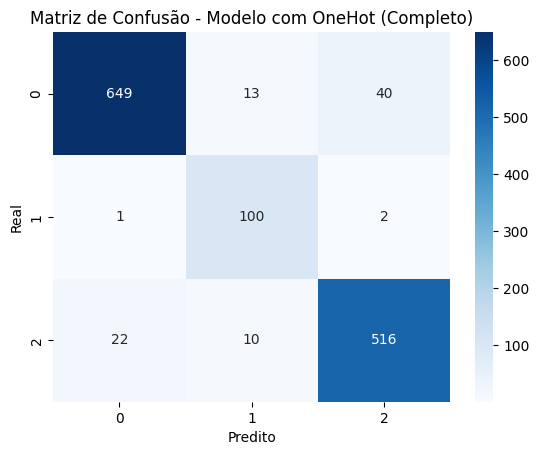

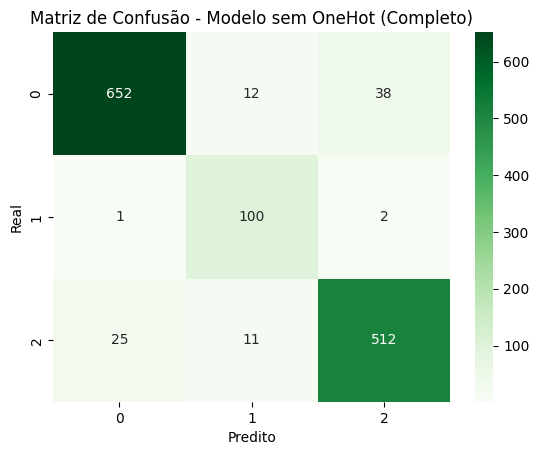

In [19]:
from sklearn.metrics import confusion_matrix

# Predições no conjunto de teste
y_pred_with_scaler = best_model_with_scaler.predict(X)
y_pred_no_scaler = best_model_no_scaler.predict(X)

# Matriz de confusão com escalonamento
cm_with_scaler = confusion_matrix(y, y_pred_with_scaler)

sns.heatmap(cm_with_scaler, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Modelo com OneHot (Completo)')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# Matriz de confusão sem escalonamento
cm_no_scaler = confusion_matrix(y, y_pred_no_scaler)

sns.heatmap(cm_no_scaler, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusão - Modelo sem OneHot (Completo)')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()


## KNN Classification Model
Feito por: Jônatas Brito

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

# Pipeline com pré-processamento + KNN
knn_with_preprocessing = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])

scoring = (
    'accuracy', 'f1_macro', 'precision_macro', 'recall_macro'
)

# Pipeline com pré-processamento
knn_with_preprocessing = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])

# Modelo sem pré-processamento
knn_no_preprocessing = KNeighborsClassifier()

# Validação cruzada com pipeline
score_with_pipeline = cross_validate(
    knn_with_preprocessing, X_train, y_train, cv=kf, scoring=scoring
)

# Cross-validate sem pré-processamento (como no seu exemplo original)
score_no_preprocessing = cross_validate(
    knn_no_preprocessing, X_train, y_train, cv=kf, scoring=scoring
)

# Cross-validate com pré-processamento
score_with_preprocessing = cross_validate(
    knn_with_preprocessing, X_train, y_train, cv=kf, scoring=scoring
)

# Resultados
knn_df_results = pd.DataFrame({
    'Sem OneHot': [score_no_preprocessing[f'test_{m}'].mean() for m in scoring],
    'Com Pré-processamento': [score_with_preprocessing[f'test_{m}'].mean() for m in scoring]
}, index=['Accuracy', 'F1_Macro', 'Precision_Macro', 'Recall_Macro'])

knn_df_results


,Sem OneHot,Com Pré-processamento
Accuracy,0.872512,0.878938
F1_Macro,0.805309,0.803149
Precision_Macro,0.832182,0.849417
Recall_Macro,0.793427,0.777911


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

knn_param_grid_with_scaler = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
}

knn_param_grid_no_scaler = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
}

knn_grid_search_with_scaler = GridSearchCV(
    estimator=knn_with_preprocessing,
    param_grid=knn_param_grid_with_scaler,
    scoring=scoring,
    refit='f1_macro',
    cv=kf,
    n_jobs=-1,
)

knn_grid_search_with_no_scaler = GridSearchCV(
    estimator=knn_no_preprocessing,
    param_grid=knn_param_grid_no_scaler,
    scoring=scoring,
    refit='f1_macro',
    cv=kf,
    n_jobs=-1,
)

# Treinamento
knn_grid_search_with_scaler.fit(X_train, y_train)
knn_grid_search_with_no_scaler.fit(X_train, y_train)

# Resultados dos melhores parâmetros e score
print("Melhores parâmetros COM pré-processamento:")
print(knn_grid_search_with_scaler.best_params_)
print(f"Melhor F1 macro com pré-processamento: {knn_grid_search_with_scaler.best_score_:.4f}")

print("\nMelhores parâmetros SEM pré-processamento:")
print(knn_grid_search_with_no_scaler.best_params_)
print(f"Melhor F1 macro sem pré-processamento: {knn_grid_search_with_no_scaler.best_score_:.4f}")


# Com pré-processamento
knn_best_model_with_preprocessing = knn_grid_search_with_scaler.best_estimator_
knn_y_pred_with_preprocessing = knn_best_model_with_preprocessing.predict(X_test)
print("\nRelatório de classificação do modelo COM pré-processamento (teste):")
print(classification_report(y_test, knn_y_pred_with_preprocessing))

# Sem pré-processamento
knn_best_model_no_preprocessing = knn_grid_search_with_no_scaler.best_estimator_
knn_y_pred_no_preprocessing = knn_best_model_no_preprocessing.predict(X_test)
print("\nRelatório de classificação do modelo SEM pré-processamento (teste):")
print(classification_report(y_test, knn_y_pred_no_preprocessing))


Melhores parâmetros COM pré-processamento:
{'knn__n_neighbors': 5, 'knn__weights': 'distance'}
Melhor F1 macro com pré-processamento: 0.8332

Melhores parâmetros SEM pré-processamento:
{'n_neighbors': 7, 'weights': 'distance'}
Melhor F1 macro sem pré-processamento: 0.8248

Relatório de classificação do modelo COM pré-processamento (teste):
              precision    recall  f1-score   support

          -1       0.88      0.93      0.90       140
           0       0.87      0.62      0.72        21
           1       0.89      0.87      0.88       110

    accuracy                           0.88       271
   macro avg       0.88      0.81      0.84       271
weighted avg       0.88      0.88      0.88       271


Relatório de classificação do modelo SEM pré-processamento (teste):
              precision    recall  f1-score   support

          -1       0.90      0.91      0.90       140
           0       0.71      0.48      0.57        21
           1       0.85      0.90      0.88  

In [22]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

# Dicionário com as métricas a serem usadas
metrics = {
    'Acurácia': accuracy_score,
    'F1 Macro': lambda y_true, y_pred: f1_score(y_true, y_pred, average='macro'),
    'Precisão Macro': lambda y_true, y_pred: precision_score(y_true, y_pred, average='macro'),
    'Recall Macro': lambda y_true, y_pred: recall_score(y_true, y_pred, average='macro'),
}

# Calcula as métricas para os dois modelos no conjunto de teste
resultados = []
for nome, func in metrics.items():
    resultados.append([
        nome,
        func(y_test, knn_y_pred_with_preprocessing),     # Com pré-processamento
        func(y_test, knn_y_pred_no_preprocessing)        # Sem pré-processamento
    ])

# Cria DataFrame de resultados
df_knn_resultados = pd.DataFrame(resultados, columns=[
    'Métrica', 'Com Pré-processamento', 'Sem Pré-processamento'
])

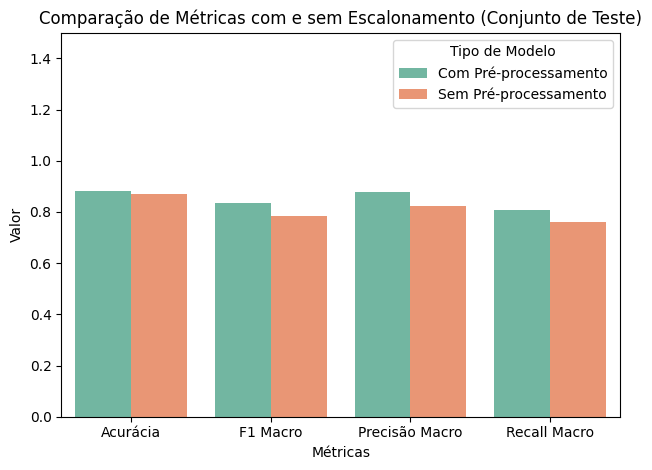

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


# Transforma o DataFrame para formato "long" (melt) para usar no seaborn
df_melted = df_knn_resultados.melt(id_vars="Métrica", var_name="Tipo", value_name="Valor")

# Plotar gráfico de barras agrupadas
sns.barplot(data=df_melted, x="Métrica", y="Valor", hue="Tipo", palette="Set2")

plt.title("Comparação de Métricas com e sem Escalonamento (Conjunto de Teste)")
plt.ylim(0, 1.5)
plt.ylabel("Valor")
plt.xlabel("Métricas")
plt.legend(title="Tipo de Modelo")
plt.tight_layout()
plt.show()

In [24]:
knn_final_model_with_scaler = knn_best_model_with_preprocessing
knn_final_model_with_scaler.fit(X_test, y_test)

knn_final_model_no_scaler = knn_best_model_no_preprocessing
knn_final_model_no_scaler.fit(X_test, y_test)

KNeighborsClassifier(n_neighbors=7, weights='distance')

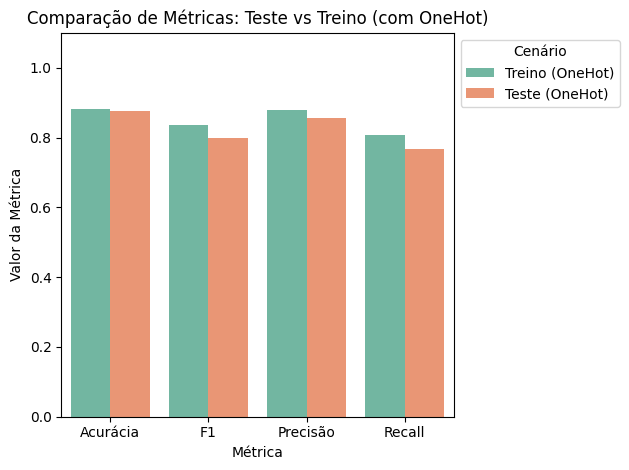

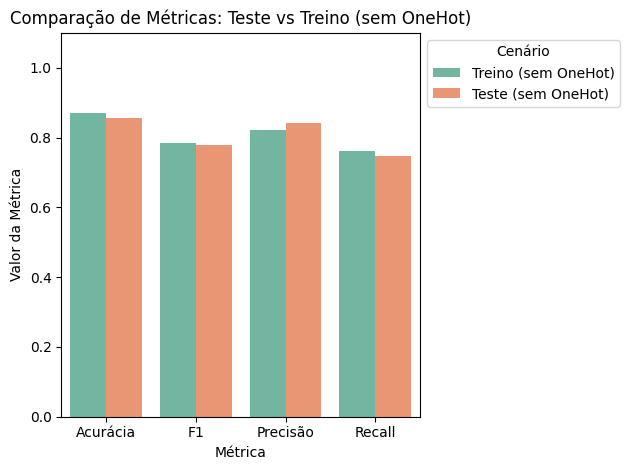

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Função para calcular métricas
metrics_dict = {
    'Acurácia': accuracy_score,
    'F1': lambda y_true, y_pred: f1_score(y_true, y_pred, average='macro'),
    'Precisão': lambda y_true, y_pred: precision_score(y_true, y_pred, average='macro'),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred, average='macro'),
}

# Previsões no conjunto completo
y_pred_full_with_scaler = knn_final_model_with_scaler.predict(X)
y_pred_full_no_scaler = knn_final_model_no_scaler.predict(X)

# Montar DataFrame de resultados
resultados = []
for nome, func in metrics_dict.items():
    resultados.append([
        nome,
        func(y_test, knn_y_pred_with_preprocessing),
        func(y, y_pred_full_with_scaler),
        func(y_test, knn_y_pred_no_preprocessing),
        func(y, y_pred_full_no_scaler)
    ])

df_resultados = pd.DataFrame(resultados, columns=[
    'Métrica',
    'Treino (OneHot)',  
    'Teste (OneHot)',    
    'Treino (sem OneHot)',
    'Teste (sem OneHot)'  
])

# Dados com escalonamento
melted_with_scaler = df_resultados.melt(
    id_vars='Métrica',
    value_vars=['Treino (OneHot)', 'Teste (OneHot)'],
    var_name='Com OneHot',
    value_name='Valor'
)

# Dados sem escalonamento
melted_no_scaler = df_resultados.melt(
    id_vars='Métrica',
    value_vars=['Treino (sem OneHot)', 'Teste (sem OneHot)'],
    var_name='Sem OneHot',
    value_name='Valor'
)

df_resultados

#Plot com escalonamento
sns.barplot(data=melted_with_scaler, x='Métrica', y='Valor', hue='Com OneHot', palette='Set2')
plt.title('Comparação de Métricas: Teste vs Treino (com OneHot)')
plt.ylim(0, 1.1)
plt.ylabel('Valor da Métrica')
plt.xlabel('Métrica')
plt.legend(title='Cenário', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot sem escalonamento
sns.barplot(data=melted_no_scaler, x='Métrica', y='Valor', hue='Sem OneHot', palette='Set2')
plt.title('Comparação de Métricas: Teste vs Treino (sem OneHot)')
plt.ylim(0, 1.1)
plt.ylabel('Valor da Métrica')
plt.xlabel('Métrica')
plt.legend(title='Cenário', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

# SVC (Support Vector Classification)

Feito por: Antonio Joabe

O Support Vector Classifier (SVC) é um algoritmo de classificação supervisionada que busca encontrar o hiperplano ótimo que separa as classes no espaço de características, maximizando a margem entre os exemplos.

In [26]:
# Pipeline com pré-processamento (OneHotEncoder)
svc_with_preprocessing = Pipeline([
    ('preprocessor', preprocessor),
    ('svc', SVC(class_weight='balanced', random_state=42))
])

# Modelo sem pré-processamento
svc_no_preprocessing = SVC(class_weight='balanced', random_state=42)

# Validação cruzada
score_no_preprocessing = cross_validate(
    svc_no_preprocessing, X_train, y_train, cv=kf, scoring=scoring
)
score_with_preprocessing = cross_validate(
    svc_with_preprocessing, X_train, y_train, cv=kf, scoring=scoring
)

svc_df_results = pd.DataFrame({
    'Sem Pré-processamento': [score_no_preprocessing[f'test_{m}'].mean() for m in scoring],
    'Com Pré-processamento': [score_with_preprocessing[f'test_{m}'].mean() for m in scoring]
}, index=['Accuracy', 'F1_Macro', 'Precision_Macro', 'Recall_Macro'])
print(svc_df_results)

                 Sem Pré-processamento  Com Pré-processamento
Accuracy                      0.868783               0.900183
F1_Macro                      0.817061               0.882548
Precision_Macro               0.794586               0.863130
Recall_Macro                  0.858896               0.910385


In [27]:
# GridSearchCV para otimização de hiperparâmetros
svc_param_grid_with_preprocessing = {
    'svc__kernel': ['linear', 'rbf'],
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 'auto']
}
svc_param_grid_no_preprocessing = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

svc_grid_search_with_preprocessing = GridSearchCV(
    estimator=svc_with_preprocessing,
    param_grid=svc_param_grid_with_preprocessing,
    scoring=scoring,
    refit='f1_macro',
    cv=kf,
    n_jobs=-1
)
svc_grid_search_no_preprocessing = GridSearchCV(
    estimator=svc_no_preprocessing,
    param_grid=svc_param_grid_no_preprocessing,
    scoring=scoring,
    refit='f1_macro',
    cv=kf,
    n_jobs=-1
)

svc_grid_search_with_preprocessing.fit(X_train, y_train)
svc_grid_search_no_preprocessing.fit(X_train, y_train)

print("Melhores parâmetros COM pré-processamento:")
print(svc_grid_search_with_preprocessing.best_params_)
print(f"Melhor F1 macro com pré-processamento: {svc_grid_search_with_preprocessing.best_score_:.4f}")

print("\nMelhores parâmetros SEM pré-processamento:")
print(svc_grid_search_no_preprocessing.best_params_)
print(f"Melhor F1 macro sem pré-processamento: {svc_grid_search_no_preprocessing.best_score_:.4f}")

Melhores parâmetros COM pré-processamento:
{'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Melhor F1 macro com pré-processamento: 0.8825

Melhores parâmetros SEM pré-processamento:
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Melhor F1 macro sem pré-processamento: 0.8692


Com os melhores hiperparâmetros encontrados, avaliamos o desempenho do modelo no conjunto de teste:


In [28]:
# Avaliação no conjunto de teste
svc_best_model_with_preprocessing = svc_grid_search_with_preprocessing.best_estimator_
svc_y_pred_with_preprocessing = svc_best_model_with_preprocessing.predict(X_test)
print("\nRelatório de classificação do modelo COM pré-processamento (teste):")
print(classification_report(y_test, svc_y_pred_with_preprocessing))

svc_best_model_no_preprocessing = svc_grid_search_no_preprocessing.best_estimator_
svc_y_pred_no_preprocessing = svc_best_model_no_preprocessing.predict(X_test)
print("\nRelatório de classificação do modelo SEM pré-processamento (teste):")
print(classification_report(y_test, svc_y_pred_no_preprocessing))


Relatório de classificação do modelo COM pré-processamento (teste):
              precision    recall  f1-score   support

          -1       0.96      0.90      0.93       140
           0       0.75      0.86      0.80        21
           1       0.90      0.95      0.92       110

    accuracy                           0.92       271
   macro avg       0.87      0.90      0.88       271
weighted avg       0.92      0.92      0.92       271


Relatório de classificação do modelo SEM pré-processamento (teste):
              precision    recall  f1-score   support

          -1       0.94      0.91      0.92       140
           0       0.86      0.86      0.86        21
           1       0.90      0.94      0.92       110

    accuracy                           0.92       271
   macro avg       0.90      0.90      0.90       271
weighted avg       0.92      0.92      0.92       271



Resumo das métricas de desempenho obtidas pelo SVC no conjunto de teste:


In [29]:
# Métricas em DataFrame para visualização
metrics = {
    'Acurácia': accuracy_score,
    'F1 Macro': lambda y_true, y_pred: f1_score(y_true, y_pred, average='macro'),
    'Precisão Macro': lambda y_true, y_pred: precision_score(y_true, y_pred, average='macro'),
    'Recall Macro': lambda y_true, y_pred: recall_score(y_true, y_pred, average='macro'),
}
resultados_svc = []
for nome, func in metrics.items():
    resultados_svc.append([
        nome,
        func(y_test, svc_y_pred_with_preprocessing),
        func(y_test, svc_y_pred_no_preprocessing)
    ])
df_svc_resultados = pd.DataFrame(resultados_svc, columns=[
    'Métrica', 'Com Pré-processamento', 'Sem Pré-processamento'
])
print(df_svc_resultados)

          Métrica  Com Pré-processamento  Sem Pré-processamento
0        Acurácia               0.915129               0.915129
1        F1 Macro               0.883414               0.898778
2  Precisão Macro               0.869461               0.897845
3    Recall Macro               0.900866               0.900216


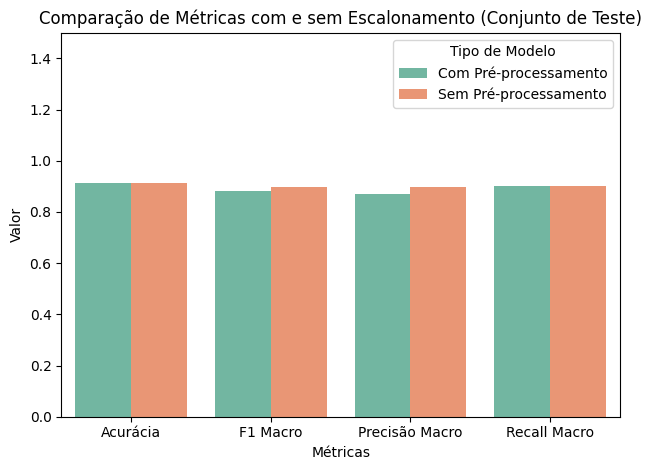

In [30]:
# Transforma o DataFrame para formato "long" (melt) para usar no seaborn
df_melted_svc = df_svc_resultados.melt(id_vars="Métrica", var_name="Tipo", value_name="Valor")
# Plotar gráfico de barras agrupadas
sns.barplot(data=df_melted_svc, x="Métrica", y="Valor", hue="Tipo", palette="Set2")
plt.title("Comparação de Métricas com e sem Escalonamento (Conjunto de Teste)")
plt.ylim(0, 1.5)
plt.ylabel("Valor")
plt.xlabel("Métricas")
plt.legend(title="Tipo de Modelo")
plt.tight_layout()
plt.show()

In [31]:
svc_final_model_with_scaler = svc_best_model_with_preprocessing
svc_final_model_with_scaler.fit(X, y)

svc_final_model_no_scaler = svc_best_model_no_preprocessing
svc_final_model_no_scaler.fit(X, y)

SVC(C=10, class_weight='balanced', random_state=42)